In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def N(mu, sigma):
    return lambda x:np.exp(-(x-mu)**2/(2*sigma*sigma))

def add(rad, delta):
    return (rad+delta+np.pi) % (2*np.pi) - np.pi

def to_rtheta(x, y):
    return np.sqrt(x**2 + y**2), add(np.arctan2(y,x), -np.pi/2)

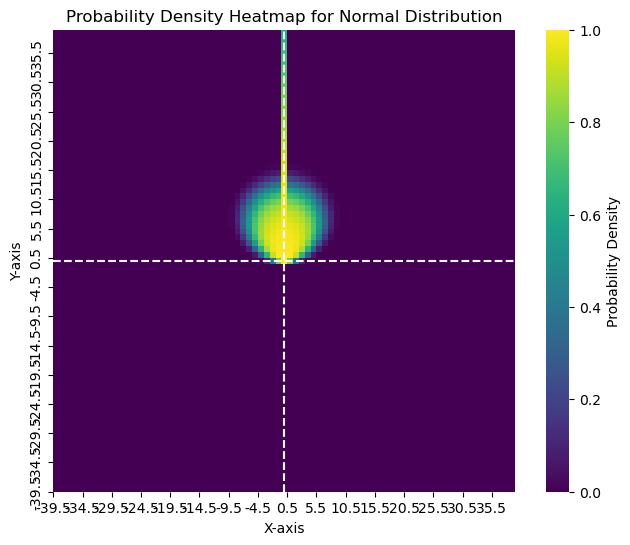

In [8]:
r=40

def func(x,y):
    r,t = to_rtheta(x,y)
    ahead = N(0, N(0, 0.3)(t)*N(0,3)(r)*10 + N(0, 0.02)(t)**3*40)(r)
    around = N(0, N(0, 1.1)(t)**2*N(0,10)(r)*10 + N(0, 0.5)(t)*N(0,8)(r)*20)(r)
    return np.maximum(ahead, around)

z = np.fromfunction(lambda i,j: func(j-r+1,i-r+1), (r*2-1,r*2-1))

# Create the plot
plt.figure(figsize=(8, 6))

# Plot the heatmap
sns.heatmap(z,
            xticklabels=10,
            yticklabels=10,
            cmap='viridis',
            cbar=True, 
            cbar_kws={'label': 'Probability Density'},
            square=True, 
            vmin=0,
            vmax=1,
            )

# Invert the y-axis
plt.gca().invert_yaxis()

# Center the x and y axes
plt.axhline(z.shape[0] / 2, color='white', linestyle='--')
plt.axvline(z.shape[1] / 2, color='white', linestyle='--')

# Adjust tick positions and labels
xticks = np.linspace(0, r*2-1, num=r*2)
yticks = np.linspace(0, r*2-1, num=r*2)
skip = 5

plt.xticks(ticks=xticks[::skip], labels=xticks[::skip]-r+0.5)
plt.yticks(ticks=yticks[::skip], labels=yticks[::skip]-r+0.5)

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Probability Density Heatmap for Normal Distribution')
plt.show()


In [37]:
z.max()

1.0